In [161]:
# Importing libraries used for the analysis
import pandas as pd
import numpy as np

import plotly.offline as pyo
import plotly.graph_objs as go

# Using latest version of statsmodel 0.9.0 (otherwise get errors during SARIMAX fit)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [162]:
# from google.colab import drive
# drive.mount('/content/drive')

In [163]:
import pandas as pd

historical_data = pd.read_csv('/content/India.csv')

In [164]:
historical_data

,Entity,Date,Renewables
0,India,1965,9.149455
1,India,1966,9.270713
2,India,1967,10.058605
3,India,1968,10.857532
4,India,1969,10.873966
5,India,1970,11.784120
6,India,1971,12.426771
7,India,1972,11.463117
8,India,1973,11.957463
9,India,1974,10.860853


In [165]:
historical_data['Date'] = historical_data['Date'].astype(str) + '-12-31'

# Step 2: Convert 'Full_Date' to datetime
historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%Y-%m-%d')

In [166]:
historical_data

,Entity,Date,Renewables
0,India,1965-12-31,9.149455
1,India,1966-12-31,9.270713
2,India,1967-12-31,10.058605
3,India,1968-12-31,10.857532
4,India,1969-12-31,10.873966
5,India,1970-12-31,11.784120
6,India,1971-12-31,12.426771
7,India,1972-12-31,11.463117
8,India,1973-12-31,11.957463
9,India,1974-12-31,10.860853


In [167]:
# Set Date column to datetime for time series
historical_data['Date'] = pd.to_datetime(historical_data['Date'],infer_datetime_format=True)

# Data file is sorted from most recent date to the past so sorting by date to go the other way around
historical_data = historical_data.sort_values(by='Date', ascending=True)

# Resetting the index due to the sort_value change
historical_data = historical_data.reset_index(drop = True)

# Dropping all columns except for the Closing Price
historical_data = historical_data.drop(columns=['Entity'])

# historical_data = historical_data.drop(columns=['Probable_MW_Capacity'])

# Setting the Date as the index
historical_data = historical_data.set_index('Date')

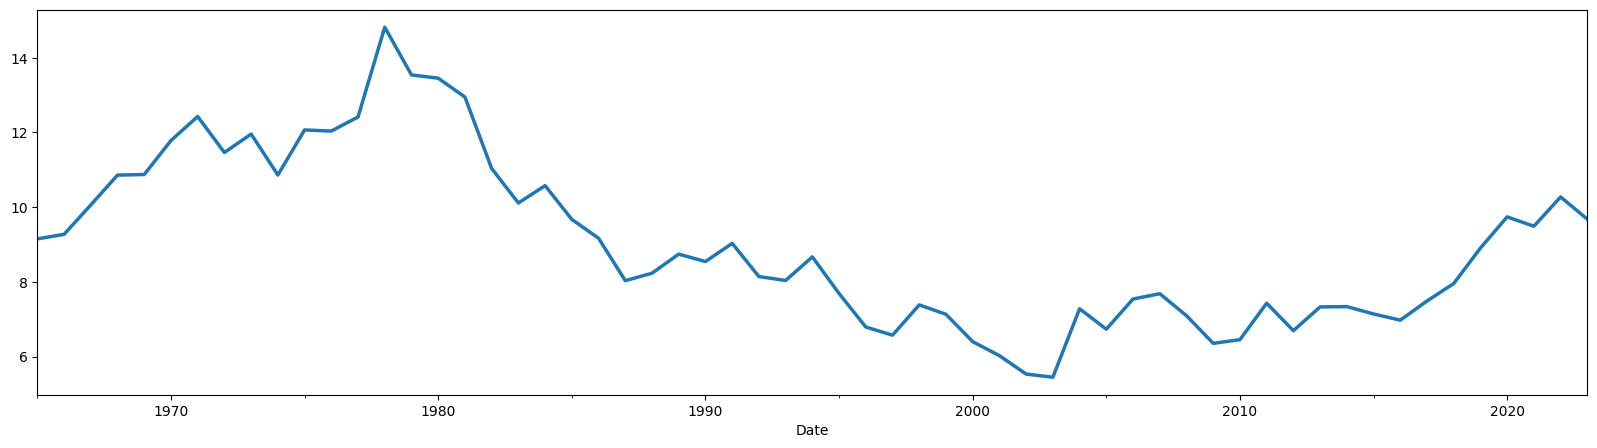

In [168]:
historical_data['Renewables'].plot(lw=2.5, figsize=(20,5));

In [169]:
historical_data

,Renewables
Date,
1965-12-31,9.149455
1966-12-31,9.270713
1967-12-31,10.058605
1968-12-31,10.857532
1969-12-31,10.873966
1970-12-31,11.784120
1971-12-31,12.426771
1972-12-31,11.463117
1973-12-31,11.957463


In [170]:
df = historical_data.loc['1965-12-31':]

In [171]:
print(df.isnull().sum())
df = df.dropna()

Renewables    0
dtype: int64


In [172]:
df

,Renewables
Date,
1965-12-31,9.149455
1966-12-31,9.270713
1967-12-31,10.058605
1968-12-31,10.857532
1969-12-31,10.873966
1970-12-31,11.784120
1971-12-31,12.426771
1972-12-31,11.463117
1973-12-31,11.957463


In [173]:
import warnings
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    try:
        for t in range(len(test)):
            model = ARIMA(history, order=arima_order)
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(test[t])
        error = mean_squared_error(test, predictions)
    except Exception as e:
        print('Error on ARIMA{}: {}'.format(arima_order, str(e)))
        return float("inf")
    return error

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                mse = evaluate_arima_model(dataset, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                print('ARIMA%s MSE=%.3f' % (order, mse))
    if best_cfg is not None:
        print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    else:
        print('No valid model was found.')

# Example usage
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

evaluate_models(df.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=4.471
ARIMA(0, 0, 1) MSE=1.745
ARIMA(0, 0, 2) MSE=1.015
ARIMA(0, 1, 0) MSE=0.492
ARIMA(0, 1, 1) MSE=0.490
ARIMA(0, 1, 2) MSE=0.489
ARIMA(0, 2, 0) MSE=1.139
ARIMA(0, 2, 1) MSE=0.566
ARIMA(0, 2, 2) MSE=0.562
ARIMA(1, 0, 0) MSE=0.454
ARIMA(1, 0, 1) MSE=0.458
ARIMA(1, 0, 2) MSE=0.448
ARIMA(1, 1, 0) MSE=0.489
ARIMA(1, 1, 1) MSE=0.496
ARIMA(1, 1, 2) MSE=0.555
ARIMA(1, 2, 0) MSE=0.740
ARIMA(1, 2, 1) MSE=0.562
ARIMA(1, 2, 2) MSE=0.624
ARIMA(2, 0, 0) MSE=0.459
ARIMA(2, 0, 1) MSE=0.518
ARIMA(2, 0, 2) MSE=0.541
ARIMA(2, 1, 0) MSE=0.493
ARIMA(2, 1, 1) MSE=0.501
ARIMA(2, 1, 2) MSE=0.574
ARIMA(2, 2, 0) MSE=0.673
ARIMA(2, 2, 1) MSE=0.677
ARIMA(2, 2, 2) MSE=0.624
Best ARIMA(1, 0, 2) MSE=0.448


In [174]:
%%time

model = sm.tsa.statespace.SARIMAX(historical_data['Renewables'],
                                order=(1, 0, 2),
                                seasonal_order=(0, 0, 0, 0),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

# Fitting the model
SARIMAX_results = model.fit()

CPU times: user 154 ms, sys: 28 µs, total: 154 ms
Wall time: 51.1 ms


In [175]:
# Getting model's predictions of the in-sample data, rounding to two decimal places for price.
SARIMAX_predictions = SARIMAX_results.predict()

# Creating a dataframe of the date index and predictions
SARIMAX_preds = pd.DataFrame(list(zip(list(SARIMAX_predictions.index),list(SARIMAX_predictions))),
                             columns=['Date','Predictedcount']).set_index('Date')

# Merging the original dataframe with predictions for comparison
SARIMAX_predicted_df = pd.merge(historical_data[1:], SARIMAX_preds, left_index=True, right_index=True)

SARIMAX_predicted_df.head()

,Renewables,Predictedcount
Date,,
1966-12-31,9.270713,9.115898
1967-12-31,10.058605,9.227961
1968-12-31,10.857532,9.970168
1969-12-31,10.873966,10.859671
1970-12-31,11.784120,10.965301


In [176]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Check for NaN values in the DataFrame
print(SARIMAX_predicted_df.isna().sum())

# Drop rows with NaN values
SARIMAX_predicted_df = SARIMAX_predicted_df.dropna()

# Calculate Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(SARIMAX_predicted_df['Renewables'], SARIMAX_predicted_df['Predictedcount'])
rmse = np.sqrt(mse)

# Print the results
print("\tMean Squared Error:", mse)
print("\tRoot Mean Squared Error:", rmse)


Renewables        0
Predictedcount    0
dtype: int64
	Mean Squared Error: 0.6229266074316192
	Root Mean Squared Error: 0.789256997074856


In [177]:

SARIMAX_forecast = SARIMAX_results.forecast(steps = 5)


In [178]:
SARIMAX_forecast

,predicted_mean
2024-12-31,9.780076
2025-12-31,9.670972
2026-12-31,9.632027
2027-12-31,9.593238
2028-12-31,9.554606


In [179]:
idx = pd.date_range('2024-12-31',periods=5, freq='Y')

SARIMAX_forecast = pd.DataFrame(list(zip(list(idx),list(SARIMAX_forecast))),
                             columns=['Date','ForecastCount']).set_index('Date')

SARIMAX_forecast.head()

,ForecastCount
Date,
2024-12-31,9.780076
2025-12-31,9.670972
2026-12-31,9.632027
2027-12-31,9.593238
2028-12-31,9.554606


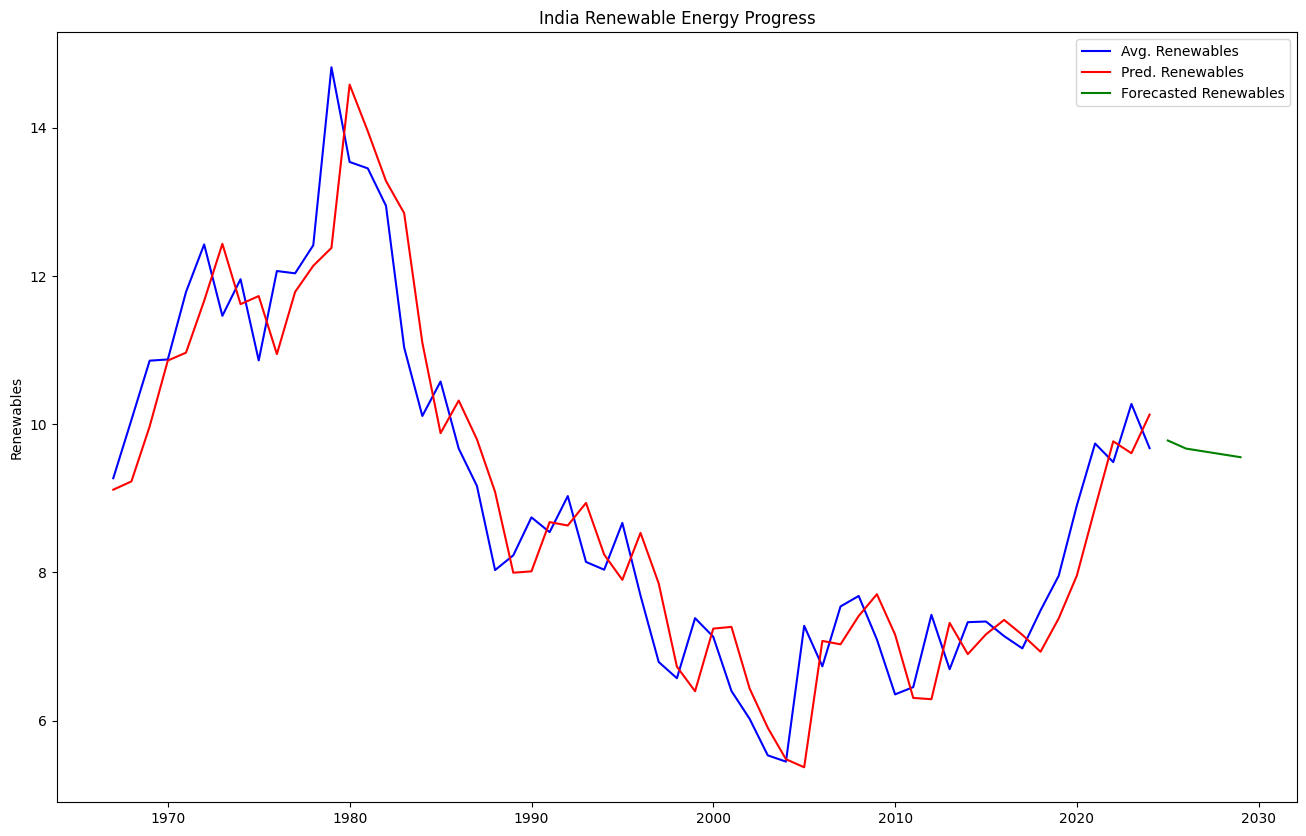

In [180]:
# Matplotlib Plot for Notebook

fig=plt.figure(figsize=[16,10])
fig.show()
ax=fig.add_subplot(111)

ax.plot(SARIMAX_predicted_df['Renewables'],c='b',label='Avg. Renewables')
ax.plot(SARIMAX_predicted_df['Predictedcount'],c='r', label='Pred. Renewables')
ax.plot(SARIMAX_forecast['ForecastCount'],c='g', label='Forecasted Renewables')

plt.legend(loc='best')
plt.ylabel('Renewables')
plt.title('India Renewable Energy Progress')
plt.draw()

In [181]:
trace0 = go.Scatter(
    x = SARIMAX_predicted_df.index,
    y = SARIMAX_predicted_df['Renewables'],
    mode = 'lines',
    name = 'Renewables'
)
trace1 = go.Scatter(
    x = SARIMAX_predicted_df.index,
    y = SARIMAX_predicted_df['Predictedcount'],
    mode = 'lines',
    name = 'Predicted Renewables'
)
trace2 = go.Scatter(
    x = SARIMAX_forecast.index,
    y = SARIMAX_forecast['ForecastCount'],
    mode = 'lines',
    name = 'Forecast Renewables'
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    title = 'India Renewable Energy Progress',
    xaxis = dict(title = 'Date'),
    yaxis = dict(title = 'Renewables')
)

fig = go.Figure(data = data, layout = layout)

pyo.plot(fig)

'temp-plot.html'

In [182]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt

# def load_data(file_path):
#     data = pd.read_csv(file_path)
#     data['Date'] = pd.to_datetime(data['Date'], format='%Y')
#     data.set_index('Date', inplace=True)
#     return data

# def fit_arima(data, p, d, q):
#     model = ARIMA(data, order=(p, d, q))
#     model_fit = model.fit()
#     return model_fit

# def forecast_and_plot(data, model_fit, forecast_years, country_name):
#     forecast_result = model_fit.get_forecast(steps=forecast_years)
#     forecast_mean = forecast_result.predicted_mean
#     forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_years + 1, freq='AS')[1:]

#     plt.figure(figsize=(12, 6))
#     plt.plot(data, label='Historical Data')
#     plt.plot(forecast_dates, forecast_mean, color='red', label='Forecast')
#     plt.title(f'Forecast of Renewable Energy Generation in {country_name}')
#     plt.xlabel('Year')
#     plt.ylabel('Renewables')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Load the data
# aus_data = load_data('Aus.csv')
# china_data = load_data('China.csv')
# india_data = load_data('India.csv')

# # Fit the model (using the best parameters found earlier or default ones)
# aus_model_fit = fit_arima(aus_data['Renewables'], 2, 1, 0)
# china_model_fit = fit_arima(china_data['Renewables'], 2, 1, 0)  # Adjust parameters as needed
# india_model_fit = fit_arima(india_data['Renewables'], 2, 1, 0)  # Adjust parameters as needed

# # Forecast and plot for the next 4 years
# forecast_and_plot(aus_data['Renewables'], aus_model_fit, 4, 'Australia')
# forecast_and_plot(china_data['Renewables'], china_model_fit, 4, 'China')
# forecast_and_plot(india_data['Renewables'], india_model_fit, 4, 'India')


In [183]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt

# def load_data(file_path):
#     data = pd.read_csv(file_path)
#     data['Date'] = pd.to_datetime(data['Date'], format='%Y')
#     data.set_index('Date', inplace=True)
#     return data

# def fit_arima(data, p, d, q):
#     model = ARIMA(data, order=(p, d, q))
#     model_fit = model.fit()
#     return model_fit

# def forecast_data(data, model_fit, forecast_years):
#     forecast_result = model_fit.get_forecast(steps=forecast_years)
#     forecast_mean = forecast_result.predicted_mean
#     forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_years + 1, freq='AS')[1:]
#     return forecast_dates, forecast_mean

# # Load the data
# aus_data = load_data('Aus.csv')
# china_data = load_data('China.csv')
# india_data = load_data('India.csv')

# # Fit the model (assuming parameters are found or guessed)
# aus_model_fit = fit_arima(aus_data['Renewables'], 2, 1, 0)
# china_model_fit = fit_arima(china_data['Renewables'], 2, 1, 0)  # Adjust parameters as needed
# india_model_fit = fit_arima(india_data['Renewables'], 2, 1, 0)  # Adjust parameters as needed

# # Forecast data
# aus_dates, aus_forecast = forecast_data(aus_data['Renewables'], aus_model_fit, 4)
# china_dates, china_forecast = forecast_data(china_data['Renewables'], china_model_fit, 4)
# india_dates, india_forecast = forecast_data(india_data['Renewables'], india_model_fit, 4)

# # Plot all forecasts on the same plot
# plt.figure(figsize=(14, 8))
# plt.plot(aus_data.index, aus_data['Renewables'], label='Historical - Australia')
# plt.plot(aus_dates, aus_forecast, 'r--', label='Forecast - Australia')
# plt.plot(china_data.index, china_data['Renewables'], label='Historical - China')
# plt.plot(china_dates, china_forecast, 'g--', label='Forecast - China')
# plt.plot(india_data.index, india_data['Renewables'], label='Historical - India')
# plt.plot(india_dates, india_forecast, 'b--', label='Forecast - India')
# plt.title('Forecast of Renewable Energy Generation')
# plt.xlabel('Year')
# plt.ylabel('Renewables')
# plt.legend()
# plt.grid(True)
# plt.show()


In [184]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# import plotly.graph_objs as go
# import plotly.offline as pyo

# def load_data(file_path):
#     data = pd.read_csv(file_path)
#     data['Date'] = pd.to_datetime(data['Date'], format='%Y')
#     data.set_index('Date', inplace=True)
#     return data

# def fit_arima(data, p, d, q):
#     model = ARIMA(data, order=(p, d, q))
#     model_fit = model.fit()
#     return model_fit

# def forecast_data(data, model_fit, forecast_years):
#     forecast_result = model_fit.get_forecast(steps=forecast_years)
#     forecast_mean = forecast_result.predicted_mean
#     forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_years + 1, freq='AS')[1:]
#     return forecast_dates, forecast_mean

# # Load the data
# aus_data = load_data('Aus.csv')
# china_data = load_data('China.csv')
# india_data = load_data('India.csv')

# # Fit the model
# aus_model_fit = fit_arima(aus_data['Renewables'], 2, 1, 0)
# china_model_fit = fit_arima(china_data['Renewables'], 2, 1, 0)
# india_model_fit = fit_arima(india_data['Renewables'], 2, 1, 0)

# # Forecast data
# aus_dates, aus_forecast = forecast_data(aus_data['Renewables'], aus_model_fit, 4)
# china_dates, china_forecast = forecast_data(china_data['Renewables'], china_model_fit, 4)
# india_dates, india_forecast = forecast_data(india_data['Renewables'], india_model_fit, 4)

# # Create Plotly traces
# trace_aus = go.Scatter(x=aus_data.index, y=aus_data['Renewables'], mode='lines', name='Historical - Australia')
# trace_aus_forecast = go.Scatter(x=aus_dates, y=aus_forecast, mode='lines', name='Forecast - Australia')

# trace_china = go.Scatter(x=china_data.index, y=china_data['Renewables'], mode='lines', name='Historical - China')
# trace_china_forecast = go.Scatter(x=china_dates, y=china_forecast, mode='lines', name='Forecast - China')

# trace_india = go.Scatter(x=india_data.index, y=india_data['Renewables'], mode='lines', name='Historical - India')
# trace_india_forecast = go.Scatter(x=india_dates, y=india_forecast, mode='lines', name='Forecast - India')

# data = [trace_aus, trace_aus_forecast, trace_china, trace_china_forecast, trace_india, trace_india_forecast]

# layout = go.Layout(
#     title='Forecast of Renewable Energy Generation',
#     xaxis=dict(title='Date'),
#     yaxis=dict(title='Renewables'),
#     template='plotly_white'
# )

# fig = go.Figure(data=data, layout=layout)

# # Save the plot
# pyo.plot(fig, filename='renewable_energy_forecast.html')
